# Load CSV file into Pandas DataFrame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('StudentsPerformance.csv')
df.head()
score_df=df.copy()
score_df



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [2]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Box Plot


{'whiskers': [<matplotlib.lines.Line2D at 0x25ac243ceb0>,
 'caps': [<matplotlib.lines.Line2D at 0x25ac2ae25b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25ac243cb50>,
 'medians': [<matplotlib.lines.Line2D at 0x25ac2ae2c70>,
 'fliers': [<matplotlib.lines.Line2D at 0x25ac2ae2fd0>,
 'means': []}

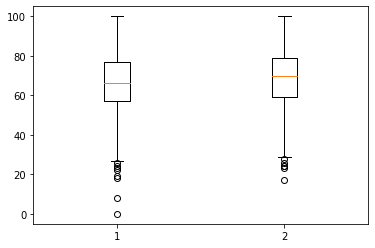

In [3]:
df_plot=[df['math score'],df['reading score']]
plt.boxplot(df_plot)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Comparing data entries with scores

C:\Users\intag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\intag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\intag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


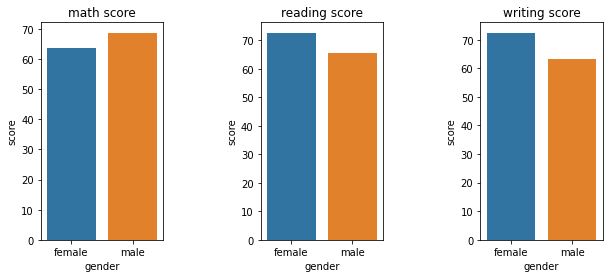

In [5]:
import seaborn as sns

fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = score_df.groupby("gender")[list(score_df.columns[-3:])[idx]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(score_df.columns[-3:])[idx])
    
plt.show()

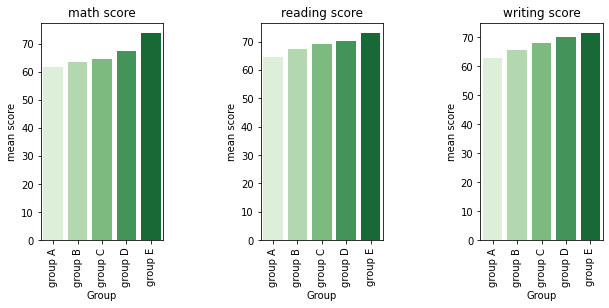

In [6]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    ethn_df = score_df.groupby("race/ethnicity")[list(score_df.columns[-3:])[idx]].mean()
    sns.barplot(x=ethn_df.index, y = ethn_df.values, palette = "Greens")
    plt.xlabel("Group")
    plt.ylabel("mean score")
    plt.xticks(rotation=90)
    plt.title(list(score_df.columns[-3:])[idx])
plt.show()

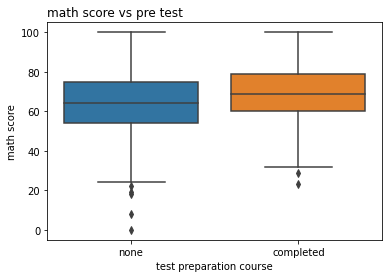

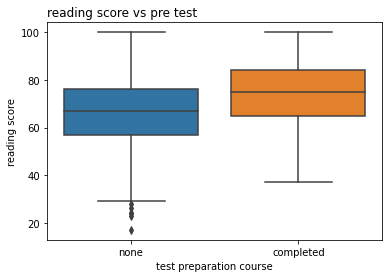

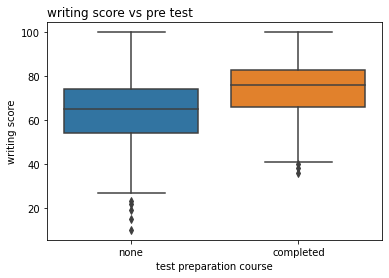

In [7]:
for item in score_df.columns[-3:]:
    sns.boxplot(x=score_df["test preparation course"], y=score_df[item])
    plt.title(item+" vs pre test", loc="left")
    plt.show()

# Converting categorical data into numerical

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le= LabelEncoder()

In [10]:
gender_encoder= le.fit_transform(df['gender'])

In [11]:
df['encoded_gender']= gender_encoder #adding encoding column to dataframe

In [12]:
df.pop('gender')  #removing gender column

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

In [13]:
df

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,encoded_gender
0,group B,bachelor's degree,standard,none,72,72,74,0
1,group C,some college,standard,completed,69,90,88,0
2,group B,master's degree,standard,none,90,95,93,0
3,group A,associate's degree,free/reduced,none,47,57,44,1
4,group C,some college,standard,none,76,78,75,1
...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,completed,88,99,95,0
996,group C,high school,free/reduced,none,62,55,55,1
997,group C,high school,free/reduced,completed,59,71,65,0
998,group D,some college,standard,completed,68,78,77,0


In [14]:
race_encoder=le.fit_transform(df['race/ethnicity'])

In [15]:
df['race_encoder']=race_encoder
df.pop('race/ethnicity')

0      group B
1      group C
2      group B
3      group A
4      group C
        ...   
995    group E
996    group C
997    group C
998    group D
999    group D
Name: race/ethnicity, Length: 1000, dtype: object

In [16]:
df

,parental level of education,lunch,test preparation course,math score,reading score,writing score,encoded_gender,race_encoder
0,bachelor's degree,standard,none,72,72,74,0,1
1,some college,standard,completed,69,90,88,0,2
2,master's degree,standard,none,90,95,93,0,1
3,associate's degree,free/reduced,none,47,57,44,1,0
4,some college,standard,none,76,78,75,1,2
...,...,...,...,...,...,...,...,...
995,master's degree,standard,completed,88,99,95,0,4
996,high school,free/reduced,none,62,55,55,1,2
997,high school,free/reduced,completed,59,71,65,0,2
998,some college,standard,completed,68,78,77,0,3


In [17]:
parental_level_of_education_encoder=le.fit_transform(df['parental level of education'])
df['parental_level_of_education_encoder']=parental_level_of_education_encoder
df.pop('parental level of education')

0       bachelor's degree
1            some college
2         master's degree
3      associate's degree
4            some college
              ...        
995       master's degree
996           high school
997           high school
998          some college
999          some college
Name: parental level of education, Length: 1000, dtype: object

In [18]:
df

,lunch,test preparation course,math score,reading score,writing score,encoded_gender,race_encoder,parental_level_of_education_encoder
0,standard,none,72,72,74,0,1,1
1,standard,completed,69,90,88,0,2,4
2,standard,none,90,95,93,0,1,3
3,free/reduced,none,47,57,44,1,0,0
4,standard,none,76,78,75,1,2,4
...,...,...,...,...,...,...,...,...
995,standard,completed,88,99,95,0,4,3
996,free/reduced,none,62,55,55,1,2,2
997,free/reduced,completed,59,71,65,0,2,2
998,standard,completed,68,78,77,0,3,4


In [19]:
lunch_encoder=pd.get_dummies(df['lunch'],drop_first=True)
df['lunch_encoder']=lunch_encoder
df.pop('lunch')

0          standard
1          standard
2          standard
3      free/reduced
4          standard
           ...     
995        standard
996    free/reduced
997    free/reduced
998        standard
999    free/reduced
Name: lunch, Length: 1000, dtype: object

In [20]:
df

,test preparation course,math score,reading score,writing score,encoded_gender,race_encoder,parental_level_of_education_encoder,lunch_encoder
0,none,72,72,74,0,1,1,1
1,completed,69,90,88,0,2,4,1
2,none,90,95,93,0,1,3,1
3,none,47,57,44,1,0,0,0
4,none,76,78,75,1,2,4,1
...,...,...,...,...,...,...,...,...
995,completed,88,99,95,0,4,3,1
996,none,62,55,55,1,2,2,0
997,completed,59,71,65,0,2,2,0
998,completed,68,78,77,0,3,4,1


In [21]:
test_preperation_course_encoder=pd.get_dummies(df['test preparation course'],drop_first=True)
df['test_preperation_course_encoder']=test_preperation_course_encoder
df.pop('test preparation course')

0           none
1      completed
2           none
3           none
4           none
         ...    
995    completed
996         none
997    completed
998    completed
999         none
Name: test preparation course, Length: 1000, dtype: object

In [22]:
df


,math score,reading score,writing score,encoded_gender,race_encoder,parental_level_of_education_encoder,lunch_encoder,test_preperation_course_encoder
0,72,72,74,0,1,1,1,1
1,69,90,88,0,2,4,1,0
2,90,95,93,0,1,3,1,1
3,47,57,44,1,0,0,0,1
4,76,78,75,1,2,4,1,1
...,...,...,...,...,...,...,...,...
995,88,99,95,0,4,3,1,0
996,62,55,55,1,2,2,0,1
997,59,71,65,0,2,2,0,0
998,68,78,77,0,3,4,1,0


# Cleaning Missing Fields

In [23]:
df.notnull()

,math score,reading score,writing score,encoded_gender,race_encoder,parental_level_of_education_encoder,lunch_encoder,test_preperation_course_encoder
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
995,True,True,True,True,True,True,True,True
996,True,True,True,True,True,True,True,True
997,True,True,True,True,True,True,True,True
998,True,True,True,True,True,True,True,True


In [24]:
df[10:25]  #display values between 10 and 25

,math score,reading score,writing score,encoded_gender,race_encoder,parental_level_of_education_encoder,lunch_encoder,test_preperation_course_encoder
10,58,54,52,1,2,0,1,1
11,40,52,43,1,3,0,1,1
12,65,81,73,0,1,2,1,1
13,78,72,70,1,0,4,1,0
14,50,53,58,0,0,3,1,1
15,69,75,78,0,2,5,1,1
16,88,89,86,1,2,2,1,1
17,18,32,28,0,1,5,0,1
18,46,42,46,1,2,3,0,0
19,54,58,61,0,2,0,0,1


In [25]:
#df.fillna('1') #fills missing fields with value 1

In [26]:
df.fillna(method='pad') #ffil and bfil can also be used
#df.ffill(axis=None, inplace=False, limit=None, downcast=None)

,math score,reading score,writing score,encoded_gender,race_encoder,parental_level_of_education_encoder,lunch_encoder,test_preperation_course_encoder
0,72,72,74,0,1,1,1,1
1,69,90,88,0,2,4,1,0
2,90,95,93,0,1,3,1,1
3,47,57,44,1,0,0,0,1
4,76,78,75,1,2,4,1,1
...,...,...,...,...,...,...,...,...
995,88,99,95,0,4,3,1,0
996,62,55,55,1,2,2,0,1
997,59,71,65,0,2,2,0,0
998,68,78,77,0,3,4,1,0


# handling inappropriate data

In [27]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [28]:
df.drop_duplicates(inplace = True)

In [29]:
df

,math score,reading score,writing score,encoded_gender,race_encoder,parental_level_of_education_encoder,lunch_encoder,test_preperation_course_encoder
0,72,72,74,0,1,1,1,1
1,69,90,88,0,2,4,1,0
2,90,95,93,0,1,3,1,1
3,47,57,44,1,0,0,0,1
4,76,78,75,1,2,4,1,1
...,...,...,...,...,...,...,...,...
995,88,99,95,0,4,3,1,0
996,62,55,55,1,2,2,0,1
997,59,71,65,0,2,2,0,0
998,68,78,77,0,3,4,1,0


<AxesSubplot:>

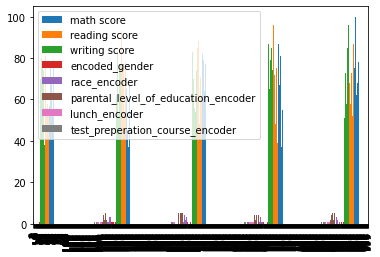

In [30]:
import matplotlib.pyplot as plt
df.plot(kind='bar')

# Feature Normalization

In [31]:
df_max_scaled=df.copy()
for columns in df_max_scaled.columns:
    df_max_scaled[columns]=df_max_scaled[columns] / df_max_scaled[columns].abs().max()
    

In [32]:
df_max_scaled


,math score,reading score,writing score,encoded_gender,race_encoder,parental_level_of_education_encoder,lunch_encoder,test_preperation_course_encoder
0,0.72,0.72,0.74,0.0,0.25,0.2,1.0,1.0
1,0.69,0.90,0.88,0.0,0.50,0.8,1.0,0.0
2,0.90,0.95,0.93,0.0,0.25,0.6,1.0,1.0
3,0.47,0.57,0.44,1.0,0.00,0.0,0.0,1.0
4,0.76,0.78,0.75,1.0,0.50,0.8,1.0,1.0
...,...,...,...,...,...,...,...,...
995,0.88,0.99,0.95,0.0,1.00,0.6,1.0,0.0
996,0.62,0.55,0.55,1.0,0.50,0.4,0.0,1.0
997,0.59,0.71,0.65,0.0,0.50,0.4,0.0,0.0
998,0.68,0.78,0.77,0.0,0.75,0.8,1.0,0.0


In [33]:
df=df_max_scaled

Bar Chart

<AxesSubplot:>

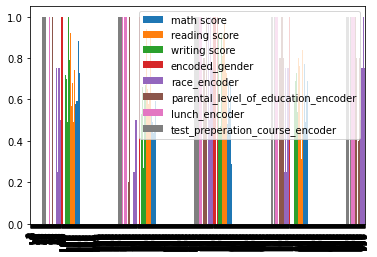

In [34]:
df.plot(kind='bar')  #bar chart

histogram visualization

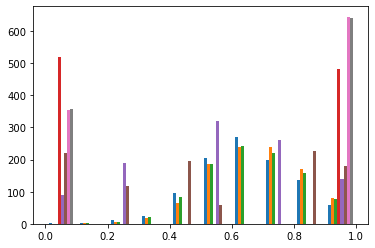

In [35]:
plt.hist(df) # histogram
plt.show()

Pie Chart

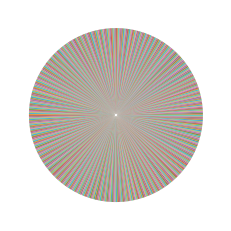

In [36]:
plt.pie(df["math score"])  #pie graph
plt.show()

Line Graph

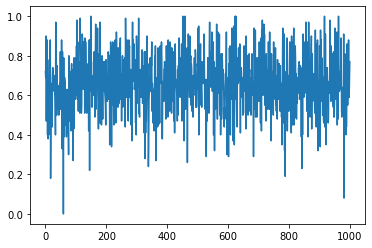

In [37]:
plt.plot(df["math score"])  #line graph
plt.show()

Box Plot

<AxesSubplot:title={'center':'parental_level_of_education_encoder'}, xlabel='math score'>

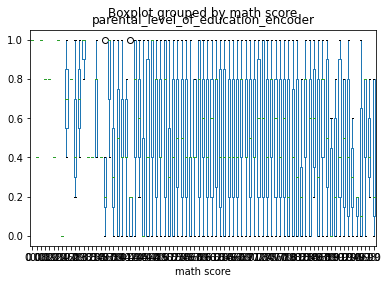

In [38]:
df.boxplot(by='math score', column=['parental_level_of_education_encoder'], grid=False)

Scatter Plot

<AxesSubplot:xlabel='math score', ylabel='writing score'>

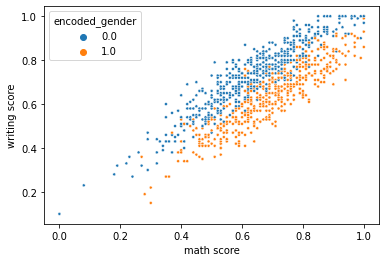

In [39]:
import seaborn
seaborn.scatterplot(x=df['math score'], y=df['writing score'], data= df,hue=df['encoded_gender'], marker = '.')

# Organise data into sets

In [40]:
from sklearn.model_selection import train_test_split
features=['math score','reading score','writing score','encoded_gender','race_encoder','lunch_encoder','parental_level_of_education_encoder']
y=df.test_preperation_course_encoder
X=df[features]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model=LogisticRegression(solver='liblinear',random_state=0)
logistic_regression_model.fit(X_train,y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [42]:
y_pred=logistic_regression_model.predict(X_test)
difference=abs(y_pred-y_test)
difference.mean()

0.37

In [43]:
from sklearn import metrics
logistic_regression_confusion_metrics = metrics.confusion_matrix(y_test, y_pred)
print("Logistic Regression Confusion Metrics")
print(logistic_regression_confusion_metrics)

Logistic Regression Confusion Metrics
[[ 24  96]
 [ 15 165]]


In [44]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.63
Precision: 0.632183908045977
Recall: 0.9166666666666666


In [45]:
import numpy as np
print("Mean  Error : " , metrics.mean_squared_error(y_test, y_pred)
)

print("Mean Square Error : " , np.sqrt(metrics.mean_squared_error(y_test, y_pred))
)
print("Mean Absolute Error : " , metrics.mean_absolute_error(y_test, y_pred)
)
        


Mean  Error :  0.37
Mean Square Error :  0.6082762530298219
Mean Absolute Error :  0.37


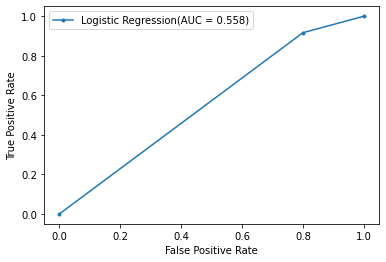

In [46]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auclg = metrics.roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,marker='.', label="Logistic Regression(AUC = %0.3f)" % auclg)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

# K-Mean

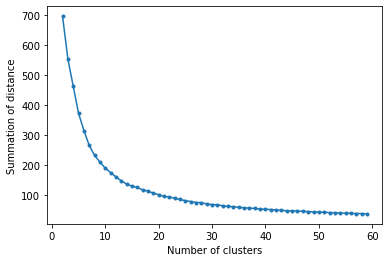

In [47]:
from sklearn.cluster import KMeans
kmeans_dis = list()
for idx in range(2, 60):  
    kmeans = KMeans(init = "k-means++", n_clusters = idx, n_init = 20)
    kmeans.fit_transform(df.iloc[:, 2:])
    kmeans_dis.append(kmeans.inertia_)
plt.plot(list(range(2,60)), kmeans_dis, marker = ".")
plt.xlabel("Number of clusters")
plt.ylabel("Summation of distance")
plt.show()

In [48]:

score_df = score_df.rename(columns={'math score': 'math', 'reading score': 'reading' , 'writing score': 'writing'})
score_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [49]:
kmeans = KMeans(init = "k-means++", n_clusters = 8)
kmeans.fit_transform(df.iloc[:, 2:])
kmeans_label = kmeans.labels_
score_df["classification"] = kmeans_label
score_df.head(10)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math,reading,writing,classification
0,female,group B,bachelor's degree,standard,none,72,72,74,3
1,female,group C,some college,standard,completed,69,90,88,4
2,female,group B,master's degree,standard,none,90,95,93,3
3,male,group A,associate's degree,free/reduced,none,47,57,44,6
4,male,group C,some college,standard,none,76,78,75,1
5,female,group B,associate's degree,standard,none,71,83,78,3
6,female,group B,some college,standard,completed,88,95,92,4
7,male,group B,some college,free/reduced,none,40,43,39,6
8,male,group D,high school,free/reduced,completed,64,64,67,7
9,female,group B,high school,free/reduced,none,38,60,50,5


In [50]:
class_df = score_df.groupby("classification")[score_df.columns[5:8]].mean()
class_df

,math,reading,writing
classification,,,
0,75.955752,72.601770,71.982301
1,69.832512,64.719212,61.906404
2,60.785714,73.428571,74.371429
3,66.530233,73.386047,72.967442
4,71.131579,79.798246,81.508772
5,52.890756,63.831933,61.781513
6,60.609524,59.076190,55.285714
7,65.639344,65.786885,65.737705


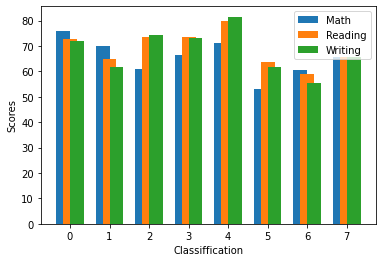

In [51]:
ind = np.arange(8)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, class_df.math, width, label='Math')
rects2 = ax.bar(ind, class_df.reading, width, label='Reading')
rects3 = ax.bar(ind + width/2, class_df.writing, width, label='Writing')

ax.set_xlabel('Classiffication')
ax.set_ylabel('Scores')
ax.set_xticks(ind)
ax.legend()
plt.show()

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

result_dict_train = {}
result_dict_test = {}
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, X_train, y_train, cv=5)
knn.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(X_test,y_test))

Train Score: 0.6442857142857142
Test Score: 0.5566666666666666


# Random Forest


In [53]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(X_train, y_train)

# predicting the x-test results
y_pred = model.predict(X_test)

# calculating the accuracies
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.69


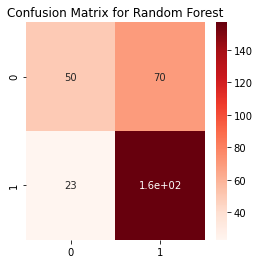

In [54]:
from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix for Random Forest', fontweight = 15, fontsize = 12)
plt.show()

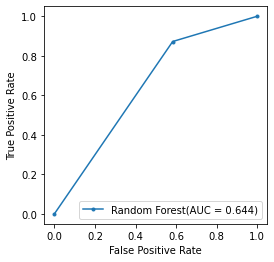

In [55]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
aucrf = metrics.roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,marker='.', label="Random Forest(AUC = %0.3f)" % aucrf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

# AdaBoostClassifier

In [56]:
from sklearn.ensemble import AdaBoostClassifier


In [57]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6633333333333333


In [59]:
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6633333333333333


# Apllying Different classifier together

In [60]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV, SelectKBest
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

classifiers = [('RandomForestClassifierG', RandomForestClassifier(n_jobs=-1, criterion='gini')),
               ('RandomForestClassifierE', RandomForestClassifier(n_jobs=-1, criterion='entropy')),
               ('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1)),
               ('DecisionTreeClassifier', DecisionTreeClassifier()),
               ('LogisticRegression', LogisticRegression())
              ]

allscores = []

x, Y = X_train,y_train
for name, classifier in classifiers:
    scores = []
    for i in range(20): # 20 runs
        roc = cross_val_score(classifier, x, Y)
        scores.extend(list(roc))
    scores = np.array(scores)
    
    print(name, scores.mean())
    new_data = [(name, score) for score in scores]
    allscores.extend(new_data)

RandomForestClassifierG 0.6857142857142857
RandomForestClassifierE 0.6867142857142858
KNeighborsClassifier 0.6442857142857144
DecisionTreeClassifier 0.6418571428571428
LogisticRegression 0.7042857142857143


In [62]:
temp = pd.DataFrame(allscores, columns=['classifier', 'score'])
#sns.violinplot('classifier', 'score', data=temp, inner=None, linewidth=0.3)
plt.figure(figsize=(15,10))
sns.factorplot(x='classifier', 
               y="score",
               data=temp, 
               saturation=1, 
               kind="points", 
               ci=None, 
               aspect=1, 
               linewidth=1, 
               size = 5)     
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

C:\Users\intag\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\intag\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


ValueError: Plot kind 'points' is not recognized

<Figure size 1080x720 with 0 Axes>